In [3]:
import numpy as np #numpy is used for performing array
import pandas as pd # used to create a data frame
import matplotlib.pyplot as plt #used for making plots and graphs
import seaborn as sns #Seaborn is the extended version of Matplotlib which uses Matplotlib along with Numpy and Pandas for plotting graphs
from sklearn.model_selection import train_test_split #scikit  it simplifies the process of implementing machine learning and statistical models
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics # to analyze the performance of predictive models. 


In [6]:
Gold_data=pd.read_csv("Data Sets/gld_price_data.csv") #loading the csv data to a pandas dataframe

In [7]:
Gold_data.head()#head print first 5 rows in the datase

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
Gold_data.tail()#tail print last 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
Gold_data.shape # shape is used for identifying no of rows and columns Don't paranthesis at end for shape

(2290, 6)

In [13]:
Gold_data.info()#getting some information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
Gold_data.isnull().sum()#isnull() is used for checking the no of missing values.sum() gives the total no of null value in each column

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
Gold_data.describe()#It is used for getting some info about statistical measueres in the data

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [29]:
Gold_data['Date'] = pd.to_datetime(Gold_data['Date'])#converting the date column to date time format

In [30]:
correlation = Gold_data.corr() #It is a statistical measure that describes the relationship between two variables

<Axes: >

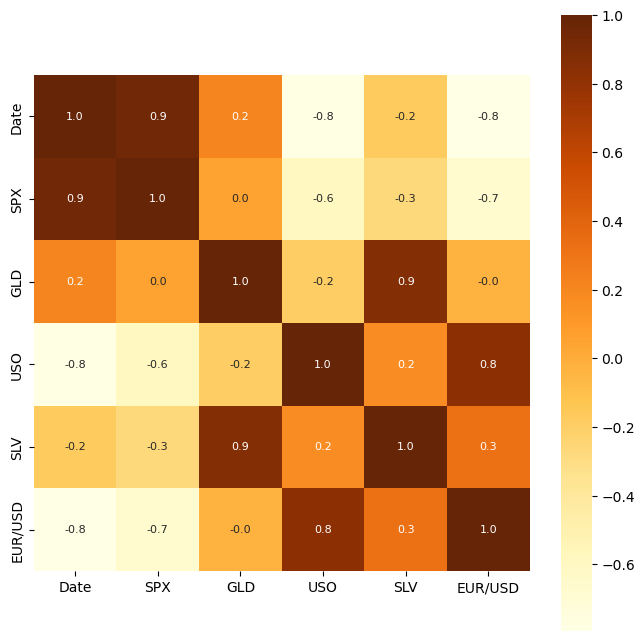

In [35]:
plt.figure(figsize=(8, 8))  # Set the size of the figure
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='YlOrBr')
#cbar=True: Displays the color bar, which indicates the scale of the values represented by colors
#square=True: Forces the cells of the heatmap to be square-shaped, making the heatmap more visually uniform.
#fmt='.1f': Specifies the format for the annotations, where .1f means one decimal place.
#annot=True: Enables annotation within the heatmap cells, displaying the numeric values on the heatmap.
#annot_kws={'size': 8}: Customizes the size of the annotation text, with size: 8 setting the font size to 8.
#cmap='YlOrBr': Sets the colormap to "Yellow-Orange-Brown," defining the color scheme used for the heatmap.

In [36]:
print(correlation['GLD']) # to see the correlation values of the gold

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\SKprasath\AppData\Local\Temp\ipykernel_376\3287817901.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Gold_data['GLD'],color='yellow')#distplot is used for the distribution of the gold price


<Axes: xlabel='GLD', ylabel='Density'>

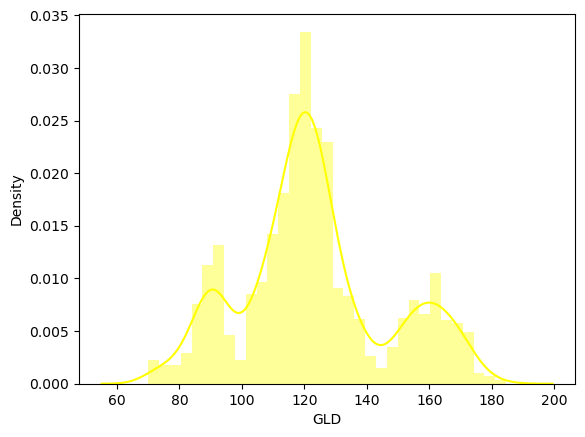

In [40]:
sns.distplot(Gold_data['GLD'],color='yellow')#distplot is used for the distribution of the gold price

In [46]:
#spliting the data
x=Gold_data.drop(['Date','GLD'],axis=1)#axis 1 indicates droping the column where axis 0 indicates droping the row
y=Gold_data['GLD']# storing the gold column in y

In [44]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [45]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [51]:
#splitting in to training and testing data

x_train, x_test, y_train ,y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

#x_train: The subset of features (independent variables) used for training the model.
#x_test: The subset of features used for testing the model's performance after training.
#y_train: The subset of target values (dependent variable) corresponding to x_train, used for training the model.
#y_test: The subset of target values corresponding to x_test, used to evaluate the model's performance.
#x: The full dataset of features (independent variables) to be split into training and testing sets.
#y: The full dataset of target values (dependent variable) to be split alongside the features.
#test_size=0.2: Specifies that 20% of the data should be allocated to the test set, while the remaining 80% is used for training.
#random_state=2: Sets a seed for the random number generator to ensure reproducibility, allowing for consistent splits across different runs.

In [60]:
#Model Training Random forest regression
regressor = RandomForestRegressor(n_estimators=100)
#n_estimators=100: Specifies the number of decision trees (estimators) to be created in the forest; here, 100 trees will be used to make predictions, improving the model's performance and stability.

In [62]:
#training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
#prediction on test data
test_data_prediction= regressor.predict(x_test)

In [64]:
print(test_data_prediction)

[168.78669985  82.1771998  116.09550036 127.7626006  120.6210012
 154.62599759 150.45999917 126.11160021 117.50869878 126.06330037
 116.64930093 172.46600065 141.89499912 167.96279885 115.32960018
 117.90070052 139.36300326 170.05050038 159.70010277 158.56839999
 155.16459984 125.31450039 175.67079983 156.72440295 125.23220042
  93.92579973  77.71210006 120.31650042 119.08159952 167.44279983
  88.09440064 125.33370039  91.20680078 117.69220039 121.05599942
 136.27780064 115.36810132 115.28070119 148.29789934 107.10880112
 104.41090253  87.22779795 126.37680081 117.82569997 152.61499866
 119.54870025 108.3902999  108.06759831  93.04710028 127.11479788
  75.00900027 113.57119904 121.49340011 111.37379896 118.81379891
 120.7607991  159.2361999  167.45330125 146.83139646  85.7114983
  94.17000047  86.77609878  90.41690049 119.08210047 126.46190052
 127.42629974 169.23599985 122.25089914 117.3611989   98.31700024
 168.59820177 143.60219852 131.65700281 121.12650198 121.17279939
 119.6878005

In [66]:
#R squared error
#R-squared (R²) is a statistical measure that indicates how well the independent variables explain the variability of the dependent variable in a regression model. It ranges from 0 to 1, where 0 means the model does not explain any variability and 1 means it explains all variability, thus a higher R² indicates a better fit of the model.

In [67]:
error_score = metrics.r2_score(y_test, test_data_prediction)
# here y_test data have original value where test_data_prediction have trained value

In [68]:
print("R squared error : ",error_score)

R squared error :  0.9891567078730091


In [69]:
#compare the actual values and predicted values in a plot

In [70]:
y_test=list(y_test)#converting the y_test to the list

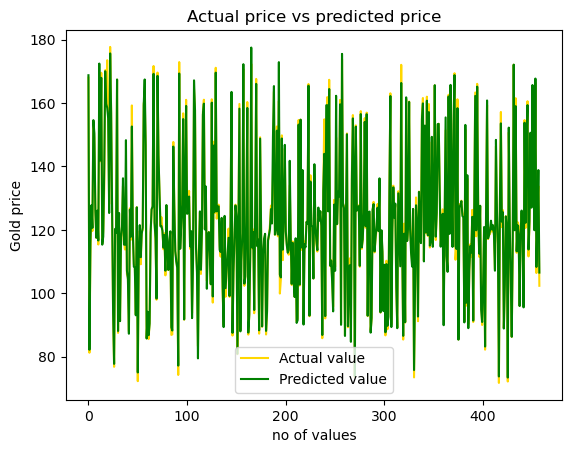

In [73]:
plt.plot(y_test, color='gold', label='Actual value')
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('no of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

#plt.plot(y_test, color='gold', label='Actual value'): Plots the actual values from the test set (y_test) in gold color and labels this line as "Actual value."
#plt.plot(test_data_prediction, color='green', label='Predicted value'): Plots the predicted values (test_data_prediction) in green color and labels this line as "Predicted value."
#plt.title('Actual price vs predicted price'): Sets the title of the plot to "Actual price vs predicted price."
#plt.xlabel('no of values'): Labels the x-axis as "no of values," indicating that it represents the index or number of data points.
#plt.ylabel('Gold price'): Labels the y-axis as "Gold price," indicating that it represents the price of gold.
#plt.legend(): Displays a legend on the plot to differentiate between the actual and predicted values based on their labels.
#plt.show(): Renders the plot and displays it on the screen.